## Can You Predict Product Backorders?
Based on historical data predict backorder risk for products

Prpduct backorders is a common supply chain problem. 
In this project I am analysisng data to identify products at risk of backorder before the event occurs so the business has time to react.
Training data file contains the historical data for the 8 weeks prior to the week we are trying to predict.


1. How many products we have? how many columns?
2. Missing values and how I deal with it,reducing the data to see a better results
3. How many products went back order?and which products?
4. which features have correlation with went back order?
5. what are forecast sales shows?
6. Relationship between forecast sales and sales
7. perofrmance of sales and lead time?
8. highest sold product amount and which products?
9. average of backorder per item?average of backorder      
10. products,probability of products went back order again?
11. which Source issue for part identified? what are the most issues?
12. relationship between sales
13. Amount of product in transit from source

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import scipy.stats as stats
import seaborn as sns

In [2]:
train_data = pd.read_csv("Kaggle_Training_Dataset_v2.csv")
train_data.head()

C:\Users\Hedi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [3]:
#data Information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk        

In [4]:
#data description
train_data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [5]:
#missing values in product
train_data.sku.isnull().sum()

0

In [6]:
#missing value 
train_data.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

### Data Preprocessing
#### Imputing missing values

Lead time has many missing values which I am going to replace it with mean of lead time and also there is a null row for all columns which I drop that column.

In [7]:
from sklearn.preprocessing import Imputer
train_data['lead_time']=Imputer(strategy='mean').fit_transform(train_data['lead_time'].values.reshape(-1,1))
#another way is using fillna
#train_data['lead_time'] = train_data['lead_time'].fillna(train_data['lead_time'].mean())

In [8]:
train_data=train_data.dropna()
train_data.isnull().sum().sum()

0

In [9]:
#replace 'yes' and 'No' to 0,1
train_data=train_data.replace(['Yes', 'No'], [1, 0])

In [10]:
#replace missing values in performance 
imp=Imputer(missing_values=-99,strategy='mean')
for data in ['perf_6_month_avg','perf_12_month_avg']:
  train_data[data] = imp.fit_transform(train_data[data].values.reshape(-1, 1))

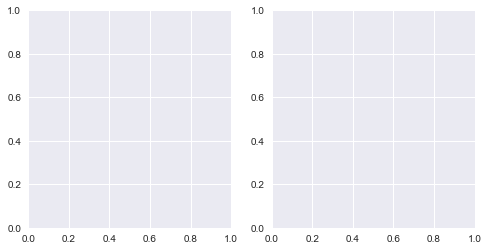

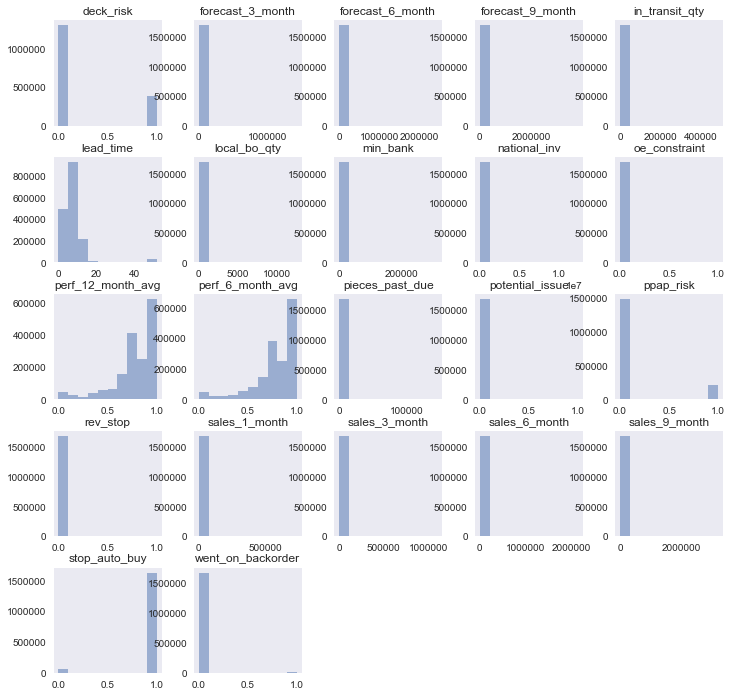

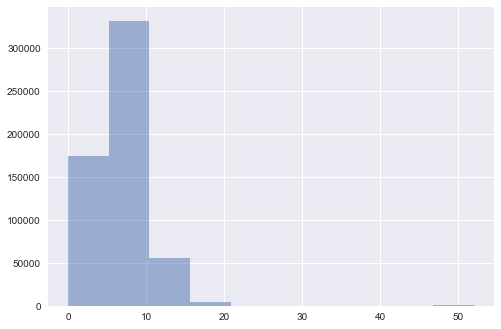

In [14]:
#train_data.iloc[1:10,1:23].head()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
train_data.hist(figsize=(12,12), alpha=0.5, grid=False)
plt.show()
plt.hist(new_data.lead_time,alpha=0.5)
plt.show()

### Data reduction

In [12]:
sales=['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
forecast=['forecast_3_month','forecast_6_month', 'forecast_9_month']
for col in sales:
    #miss_sales=sml_data[sml_data[col]==0]
    for col2 in forecast:
    #miss_forecast=sml_data[sml_data[col2]==0]
#if (miss_sales & miss_forecast ):
    #print(len())
     new_data=train_data[(train_data[col2]!=0) & (train_data[col]!=0)]
    #new_data = train_data.loc[(train_data["forecast_3_month"]>0)&(train_data["sales_9_month"]>0)]
new_data.head(5)
new_data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,567433.000000,567433.000000,567433.000000,5.674330e+05,5.674330e+05,5.674330e+05,567433.000000,5.674330e+05,5.674330e+05,5.674330e+05,...,567433.000000,567433.000000,567433.000000,567433.000000,567433.000000,567433.000000,567433.000000,567433.000000,567433.000000,567433.000000
mean,412.739649,6.932635,114.614233,4.795710e+02,9.404984e+02,1.394153e+03,150.711252,4.710948e+02,9.250101e+02,1.414449e+03,...,5.455206,0.815976,0.809092,1.727383,0.067471,0.000338,0.098625,0.979280,0.000042,0.015806
std,5056.570039,3.786231,1934.794799,8.258273e+03,1.625493e+04,2.417999e+04,3086.366347,8.235161e+03,1.595431e+04,2.479861e+04,...,361.766018,0.220276,0.213648,55.951851,0.250835,0.018392,0.298158,0.142444,0.006503,0.124726
min,-27256.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,4.000000,0.000000,1.000000e+00,7.000000e+00,1.300000e+01,1.000000,5.000000e+00,1.100000e+01,1.600000e+01,...,0.000000,0.730000,0.740000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,33.000000,8.000000,0.000000,1.600000e+01,4.200000e+01,7.000000e+01,7.000000,2.500000e+01,5.200000e+01,7.800000e+01,...,0.000000,0.890000,0.880000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,143.000000,8.000000,19.000000,1.020000e+02,2.200000e+02,3.360000e+02,38.000000,1.270000e+02,2.570000e+02,3.870000e+02,...,0.000000,0.980000,0.970000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,845246.000000,52.000000,489408.000000,1.427612e+06,2.461360e+06,3.777304e+06,741774.000000,1.105478e+06,2.146625e+06,3.205172e+06,...,146496.000000,1.000000,1.000000,12530.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


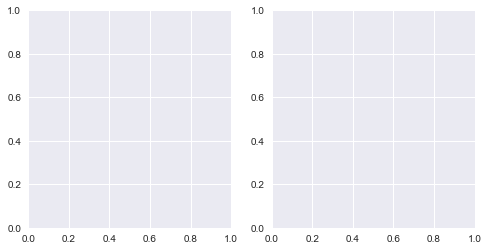

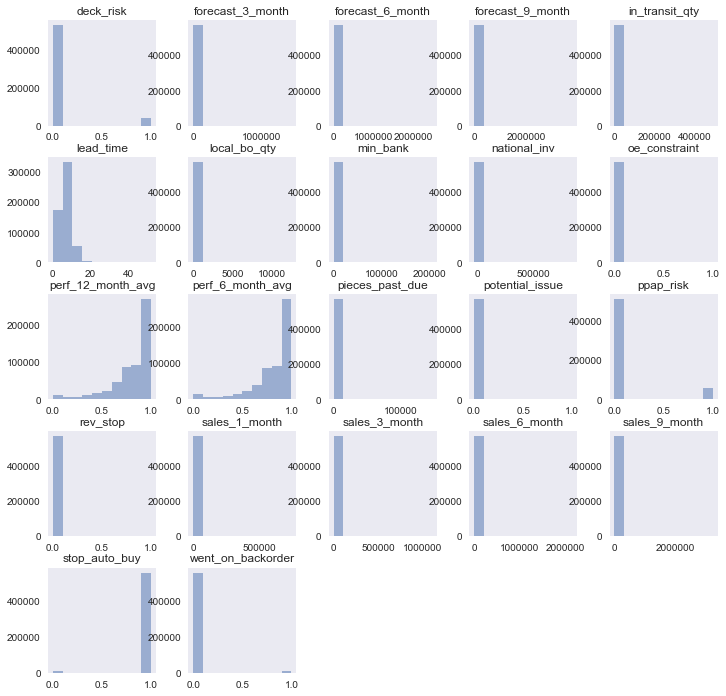

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
new_data.hist(figsize=(12,12), alpha=0.5, grid=False)
plt.show()

### Normalization
The simplest method is rescaling the range of features to scale the range in [0, 1] or [−1, 1]. 

$$x_{normalized} = \frac{x-x_{min}}{x_{max}-x_{min}}.$$


In [15]:
from sklearn.preprocessing import normalize

norm_col=['forecast_3_month', 
                   'forecast_6_month', 'forecast_9_month', 'min_bank',
                   'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
                   'sales_3_month', 'sales_6_month', 'sales_9_month']

new_data[norm_col]=normalize(new_data[norm_col],axis=1)
new_data.head()

C:\Users\Hedi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hedi\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
97,1111577,59.0,12.0,1.0,0.275108,0.462061,0.524378,0.013679,0.113995,0.352625,...,0.0,0.98,0.95,0.0,0,0,0,1,0,0
110,1111590,6.0,8.0,0.0,0.000000,0.000000,0.198030,0.000000,0.099015,0.396059,...,0.0,0.81,0.80,0.0,0,0,0,1,0,0
115,1111595,6.0,8.0,3.0,0.205053,0.438068,0.624480,0.065244,0.205053,0.335541,...,0.0,0.60,0.54,0.0,0,0,0,1,0,0
118,1111598,360.0,8.0,0.0,0.285418,0.456669,0.627920,0.079600,0.165225,0.304446,...,0.0,1.00,1.00,0.0,0,0,0,1,0,0
123,1111603,500.0,8.0,0.0,0.554261,0.554261,0.554261,0.017626,0.082031,0.141780,...,0.0,0.91,0.80,0.0,0,0,0,1,0,0


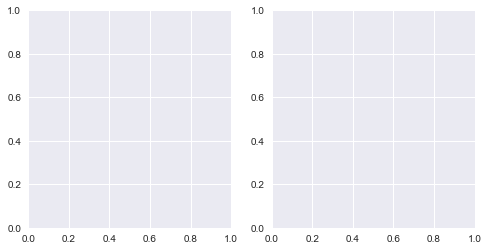

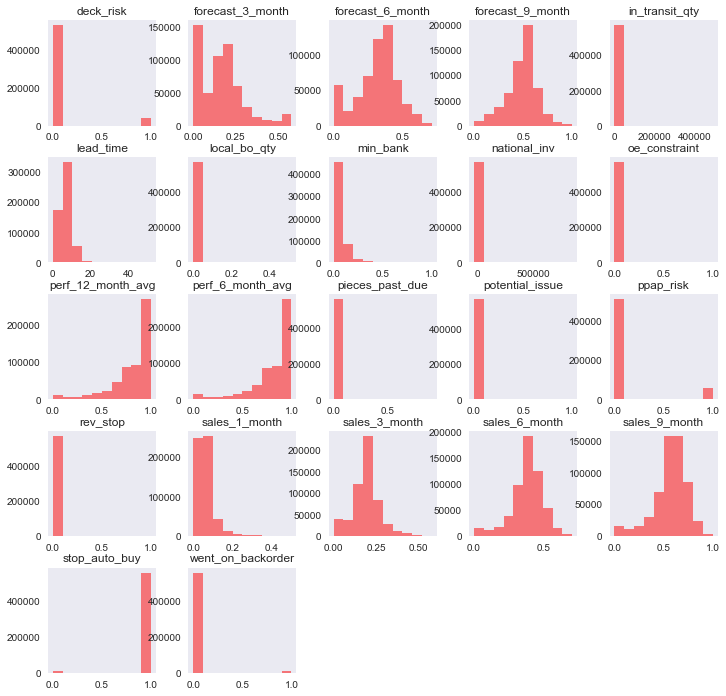

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
new_data.hist(figsize=(12,12), alpha=0.5,color='red', grid=False)
plt.show()

### Standardization
Stardardization is centering the data around 0 and scale with respect to the standard deviation:

$$x_{standardized} = \frac{x-\mu}{\sigma},$$
where $\mu$ and $\sigma$ are the mean and standard deviation of the dataset, respectively.

In [17]:
from sklearn.preprocessing import scale
new_data['lead_time']=scale(new_data['lead_time'])
#plt.hist(new_data.lead_time,alpha=0.5)
#plt.show()

C:\Users\Hedi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Data Visualizarion:
Heatmap shows coroolation between data.
which features have correlation with went back order?


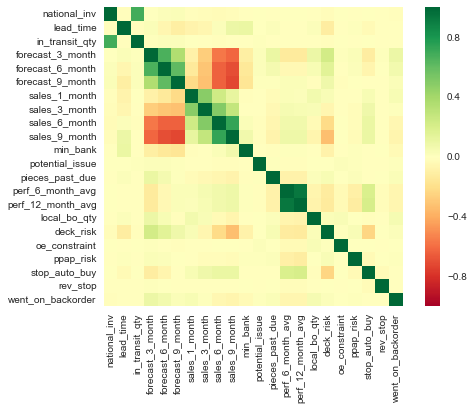

In [18]:
sns.heatmap(new_data.corr(), square=True, cmap='RdYlGn')
plt.show()

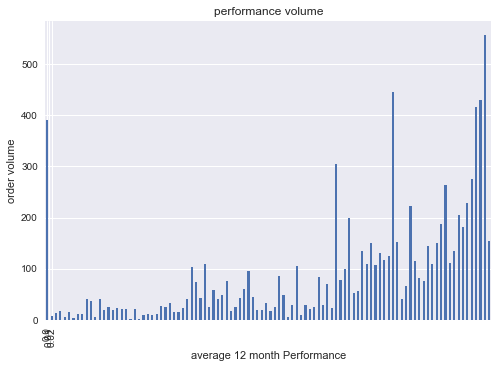

In [39]:
perf=new_data[new_data.went_on_backorder==1]
perf=perf.perf_12_month_avg.value_counts()
perf.sort_index().plot(kind='bar')
_=plt.xlabel('average 12 month Performance')
_=plt.ylabel('sales volume')
_=plt.xticks([0,0.5,1])
plt.title('performance volume')
plt.show()

In [48]:
#probability of product went on backorder 
prob=new_data[new_data.went_on_backorder==1]
prob=(prob.sku.size)/(new_data.sku.size)
prob=prob*100,'%'
prob

(1.5806271401205076, '%')

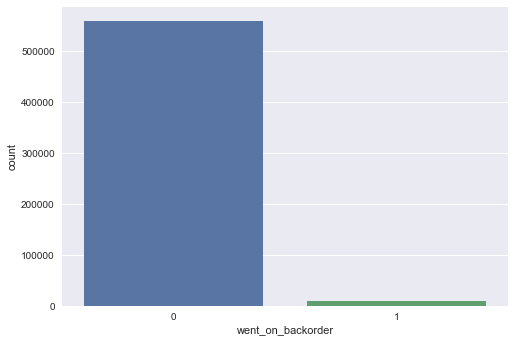

In [46]:
sns.countplot(new_data.went_on_backorder)
plt.show()

In [ ]:
c = new_data[new_data.went_on_backorder==1]
c = c.groupby(['local_bo_qty','went_on_backorder']).size()
c = c.unstack('went_on_backorder')
c.plot(kind='area')

plt.show()

In [ ]:
#c=new_data[['local_bo_qty','went_on_backorder']]
#c=new_data[new_data.went_on_backorder==1]
plt.scatter(new_data.went_on_backorder, new_data.local_bo_qty)
plt.show()

In [ ]:
#Relationship between forecast sales and sales

plt.plot(new_data.forecast_9_month,new_data.sales_9_month, color='red') 


# Add the axis labels
plt.xlabel('forecast')
plt.ylabel('Sales')


# Add a title and display the plot
plt.title('sales vs forecast')
plt.show()

In [ ]:
plt.scatter(new_data.went_on_backorder, new_data.forecast_6_month)
plt.show()